In [1]:
import numpy as np
import pandas as pd
from scipy.special import logit
from fairforest import d_tree, random_tree
from fairforest import utils
import warnings
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [2]:
warnings.simplefilter("ignore")


In [3]:
np.random.seed(10)


In [4]:
def build_dataset(total_sample,number_of_correlated_features,number_of_important_features,number_of_uncorrelated_features,mean_correlated_0,mean_correlated_1,mean_imp_0,mean_imp_1):
    mid = int(total_sample/2)
    z0_prob = 0.3
    z1_prob = 0.65
    z = np.ones(total_sample)
    x_correlated = np.zeros((total_sample,number_of_correlated_features))
    x_important = np.zeros((total_sample,number_of_important_features))
    
    var_0 = var_1 = 1
    #y1z1 = np.ones(650)
    #y1z0 = np.zeros(350)
    #y0z1 = np.ones(300)
    #y0z0 = np.zeros(700)
    #z = np.concatenate((y1z1,y1z0,y0z1,y0z0))
    y = np.zeros(total_sample)
    for i in range (mid):
        y[i] = 1
        z[i] = np.random.binomial(1, z1_prob)
        if z[i] == 1:
            for j in range (number_of_correlated_features):
                x_correlated[i][j] = np.random.normal(mean_correlated_1[j], 1)
        else:
            for j in range (number_of_correlated_features):
                x_correlated[i][j] = np.random.normal(mean_correlated_0[j], 1)
        for k in range(number_of_important_features):
            x_important[i][k] = np.random.normal(mean_imp_1[k], 1)


    for i in range (mid):
        z[mid+i] = np.random.binomial(1, z0_prob)
        if z[mid+i] == 0:
            for j in range (number_of_correlated_features):
                x_correlated[mid+i][j] =  np.random.normal(mean_correlated_0[j], 1)
        else:
            for j in range (number_of_correlated_features):
                x_correlated[mid+i][j] = np.random.normal(mean_correlated_1[j], 1)
        for k in range(number_of_important_features):
            x_important[mid+i][k] = np.random.normal(mean_imp_0[k], 1)
    #x_unimportant =  np.random.multivariate_normal(uncorr_sample_mean, uncorr_sample_cov, size=total_sample)
    x = np.concatenate((x_correlated,x_important),axis = 1)
    x = np.concatenate((x,np.reshape(z,(-1,1))),axis = 1)
    #np.random.shuffle(x)



    count_z0 = count_z1 = 0
    count0 = count1 = 0
    z0 = z1 = 0
    for i in range (total_sample):
        if y[i] == 0:
            count0+=1
        else:
            count1+=1
            if x[i][total_feature-1] == 0:
                count_z0 += 1
            else:
                count_z1 +=1
        if x[i][total_feature-1] == 0:
            z0+=1
        else:
            z1+=1
    print(count0,count1, count_z0,count_z1,z0,z1)

    total_features = number_of_correlated_features+number_of_important_features+1
    column = []
    for i in range(total_features):
        column.append(str(i+1))
    print(column)
    dataframe = pd.DataFrame(x, columns = column)
    return dataframe,y

In [5]:
total_sample = 500
number_of_correlated_features = 2
number_of_important_features = 2
number_of_uncorrelated_features = 0
total_feature = number_of_important_features+number_of_correlated_features+1
feature = np.arange(number_of_important_features+number_of_correlated_features+1)
score_fairness = np.zeros(number_of_important_features+number_of_correlated_features+1)
score_feature = np.zeros(number_of_important_features+number_of_correlated_features+1)
mean_correlated_1 = [20, 20]
mean_correlated_0 = [13, 11]
mean_imp_1 = [50,54]
mean_imp_0 = [49,55]

for i in range (1):
    dataframe, y = build_dataset(total_sample,number_of_correlated_features,number_of_important_features,number_of_uncorrelated_features,mean_correlated_0,mean_correlated_1,mean_imp_0,mean_imp_1)
    #####protected_attribute,protected_value,protected_feature,fairness_metric
    model_dtree = d_tree.DecisionTree(4,0,'5',1)
    model_dtree.fit(dataframe,y)
    fairness_importance = model_dtree._fairness_importance()
    feature_importance = model_dtree._feature_importance()
    for key, value in fairness_importance.items():
        score_fairness[int(key)-1]+=value
    for key, value in feature_importance.items():
        score_feature[int(key)-1]+=value
for i in range (total_feature):
    score_fairness[i] /= 1
    score_feature[i] /= 1

with open('Results/Synthetic/no_corr/result__print_dp_2_2.txt', 'a') as f:
    f.writelines(str(score_fairness))
    f.writelines("\n")
    f.writelines(str(score_feature))

250 250 87 163 263 237
['1', '2', '3', '4', '5']
1.0
4 0.9671391298215922 1.0
1 0.9671391298215922 0.08108108108108114
3 1.0 0.8402777777777778
2 1.0 1.0
4 0.8402777777777778 1.0
1 0.8402777777777778 0.0
2 1.0 1.0
3 1.0 1.0
1 1.0 1.0
3 1.0 1.0
2 0.0 1.0
3 0.0 0.06666666666666665
3 1.0 1.0
3 1.0 1.0
1 1.0 1.0
1 1.0 1.0
1 0.06666666666666665 0.8571428571428572
1 0.06666666666666665 1.0
1 0.8571428571428572 1.0
2 1.0 1.0
4 1.0 1.0
3 1.0 1.0
2 1.0 0.0
4 1.0 1.0
3 0.0 1.0
1 1.0 1.0
1 1.0 1.0
4 0.08108108108108114 0.22058823529411764
4 0.08108108108108114 0.9861111111111112
3 0.22058823529411764 0.3207547169811321
4 0.22058823529411764 1.0
4 0.3207547169811321 0.47058823529411764
2 0.3207547169811321 0.36111111111111116
3 0.47058823529411764 1.0
1 0.47058823529411764 0.25
1 1.0 1.0
2 1.0 1.0
4 0.25 1.0
3 0.25 0.16666666666666663
3 1.0 1.0
2 1.0 1.0
1 0.16666666666666663 1.0
1 0.16666666666666663 1.0
1 1.0 1.0
1 0.36111111111111116 0.26086956521739135
1 0.36111111111111116 1.0
3 0.26086956521

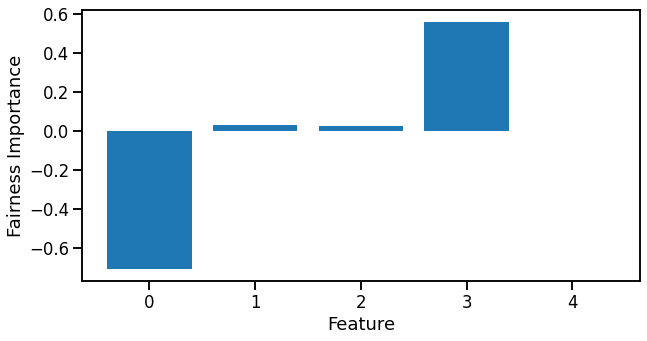

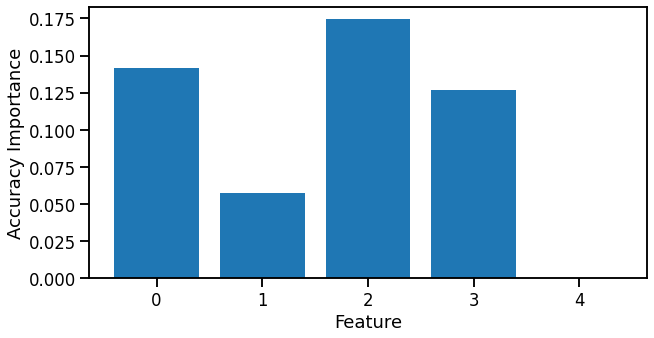

In [6]:
utils.draw_plot(feature,score_fairness,"Results/Synthetic/no_corr/dp_print_fairness_2_2_1.pdf","Fairness Importance")
utils.draw_plot(feature,score_feature,"Results/Synthetic/no_corr/dp_print_feature_2_2_1.pdf","Accuracy Importance")


In [7]:
utils.print_tree(model_dtree)


The binary tree structure has 201 nodes and has the following tree structure:

splitnode=0
 impurity 0.5, 
 fairness 1.0 
 samples 500 
 z0 263, z1 237
 pos_z0 87,pos_z1 163
 split 1 if X[:,3] <= 48.995036385303294 else 2.
	splitnode=1
	 impurity 0.31999999999999984, 
	 fairness 0.9671391298215922 
	 samples 160 
	 z0 104, z1 56
	 pos_z0 13,pos_z1 19
	 split 3 if X[:,4] <= 54.38876324632119 else 4.
	splitnode=2
	 impurity 0.46013840830449815, 
	 fairness 0.9671391298215922 
	 samples 340 
	 z0 159, z1 181
	 pos_z0 74,pos_z1 144
	 split 55 if X[:,1] <= 15.061482067578954 else 56.
		splitnode=3
		 impurity 0.49725651577503416, 
		 fairness 1.0 
		 samples 54 
		 z0 30, z1 24
		 pos_z0 9,pos_z1 16
		 split 5 if X[:,3] <= 48.315693908030525 else 6.
		splitnode=4
		 impurity 0.12335350658597366, 
		 fairness 1.0 
		 samples 106 
		 z0 74, z1 32
		 pos_z0 4,pos_z1 3
		 split 37 if X[:,2] <= 21.62281180109146 else 38.
			splitnode=5
			 impurity 0.2550000000000001, 
			 fairness 0.84027777777

In [8]:
cov = np.zeros(total_feature-1)
for i in range (total_feature - 1):
    cov[i],_ = pearsonr(dataframe[str(i+1)].to_numpy(),y)
    print(cov[i])

0.3532629375212603
0.3430945863650381
0.4660532375692361
-0.4571479230068681


In [9]:
fairness_depth = np.zeros((model_dtree.total_level,total_feature))
for i in range (model_dtree.total_level):
    fairness_importance = model_dtree._fairness_importance_depth(i)
    for key, value in fairness_importance.items():
        fairness_depth[i][int(key)-1] = value

In [10]:
for i in range (len(fairness_depth)):
        print("level ",i," ",fairness_depth[i])



level  0   [0. 0. 0. 0. 0.]
level  1   [0.         0.         0.         0.01051548 0.        ]
level  2   [ 0.          0.         -0.01725     0.01051548  0.        ]
level  3   [ 0.          0.         -0.01725     0.01690437  0.        ]
level  4   [ 0.          0.         -0.01725     0.01690437  0.        ]
level  5   [ 0.          0.         -0.01725     0.01690437  0.        ]
level  6   [ 0.          0.         -0.01725     0.01690437  0.        ]
level  7   [ 0.          0.         -0.01725     0.01690437  0.        ]
level  8   [-0.05713889  0.         -0.01725     0.01690437  0.        ]
level  9   [-0.05713889  0.034      -0.01725     0.01690437  0.        ]
level  10   [-0.05713889  0.034      -0.01725     0.01690437  0.        ]
level  11   [-0.05713889  0.034      -0.01725     0.01690437  0.        ]
level  12   [-0.05713889  0.034      -0.01725     0.01690437  0.        ]
level  13   [-0.05713889  0.034      -0.01725     0.01690437  0.        ]
level  14   [-0.05713889

In [11]:
total_sample = 1000
number_of_correlated_features = 2
number_of_important_features = 2
number_of_uncorrelated_features = 0
total_feature = number_of_important_features+number_of_correlated_features+1
feature = np.arange(number_of_important_features+number_of_correlated_features+1)
score_fairness = np.zeros(number_of_important_features+number_of_correlated_features+1)
score_feature = np.zeros(number_of_important_features+number_of_correlated_features+1)
mean_correlated_1 = [20, 20]
mean_correlated_0 = [13, 11]
mean_imp_1 = [50,54]
mean_imp_0 = [49,55]

for i in range (1):
    dataframe, y = build_dataset(total_sample,number_of_correlated_features,number_of_important_features,number_of_uncorrelated_features,mean_correlated_0,mean_correlated_1,mean_imp_0,mean_imp_1)
    #####protected_attribute,protected_value,protected_feature,fairness_metric
    model_dtree = d_tree.DecisionTree(4,0,'5',1)
    model_dtree.fit(dataframe,y)
    fairness_importance = model_dtree._fairness_importance()
    feature_importance = model_dtree._feature_importance()
    for key, value in fairness_importance.items():
        score_fairness[int(key)-1]+=value
    for key, value in feature_importance.items():
        score_feature[int(key)-1]+=value
for i in range (total_feature):
    score_fairness[i] /= 1
    score_feature[i] /= 1

with open('Results/Synthetic/no_corr/result__print_dp_2_2.txt', 'a') as f:
    f.writelines(str(score_fairness))
    f.writelines("\n")
    f.writelines(str(score_feature))

500 500 162 338 512 488
['1', '2', '3', '4', '5']
1.0
3 0.9715464971875228 0.9800557232412352
1 0.9715464971875228 1.0
1 0.9800557232412352 0.046511627906976716
1 0.9800557232412352 0.07009345794392519
2 0.046511627906976716 0.8536585365853658
4 0.046511627906976716 0.808641975308642
3 0.8536585365853658 1.0
4 0.8536585365853658 0.7142857142857143
1 1.0 1.0
2 0.7142857142857143 0.0
3 0.7142857142857143 1.0
1 0.0 0.0
2 0.0 1.0
1 1.0 0.0
2 0.0 1.0
4 1.0 1.0
4 1.0 1.0
1 1.0 1.0
2 1.0 1.0
1 1.0 1.0
3 1.0 1.0
1 1.0 1.0
4 1.0 1.0
1 1.0 0.23529411764705888
4 1.0 1.0
3 0.23529411764705888 1.0
4 0.23529411764705888 0.0
1 1.0 0.0
1 1.0 1.0
2 0.0 1.0
1 1.0 1.0
4 0.0 0.0
2 0.0 0.6923076923076923
1 0.6923076923076923 1.0
3 1.0 1.0
2 1.0 1.0
2 1.0 1.0
1 1.0 1.0
4 1.0 1.0
3 0.808641975308642 0.7857142857142857
1 0.808641975308642 0.64
3 0.7857142857142857 0.41666666666666663
2 0.7857142857142857 1.0
4 0.41666666666666663 1.0
3 0.41666666666666663 0.19999999999999996
1 1.0 1.0
1 0.19999999999999996 1.

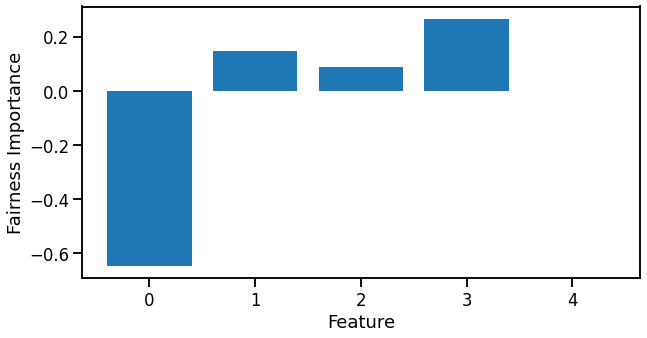

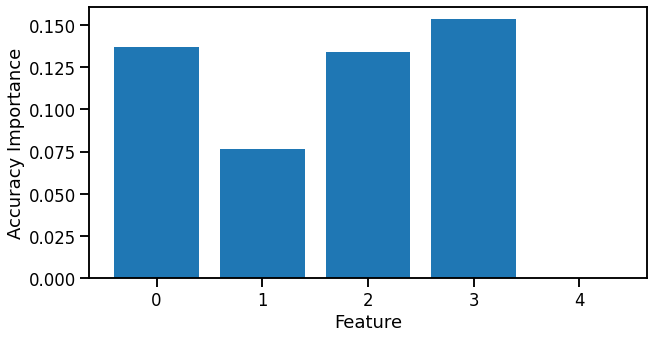

In [12]:
utils.draw_plot(feature,score_fairness,"Results/Synthetic/no_corr/dp_print_fairness_2_2_1.pdf","Fairness Importance")
utils.draw_plot(feature,score_feature,"Results/Synthetic/no_corr/dp_print_feature_2_2_1.pdf","Accuracy Importance")


In [13]:
utils.print_tree(model_dtree)


The binary tree structure has 371 nodes and has the following tree structure:

splitnode=0
 impurity 0.5, 
 fairness 1.0 
 samples 1000 
 z0 512, z1 488
 pos_z0 162,pos_z1 338
 split 1 if X[:,4] <= 55.046783302380554 else 2.
	splitnode=1
	 impurity 0.4570007137881511, 
	 fairness 0.9715464971875228 
	 samples 682 
	 z0 313, z1 369
	 pos_z0 146,pos_z1 295
	 split 3 if X[:,3] <= 49.41711559936658 else 4.
	splitnode=2
	 impurity 0.3022230133301689, 
	 fairness 0.9715464971875228 
	 samples 318 
	 z0 199, z1 119
	 pos_z0 16,pos_z1 43
	 split 275 if X[:,1] <= 18.65566205068411 else 276.
		splitnode=3
		 impurity 0.487759729742237, 
		 fairness 0.9800557232412352 
		 samples 294 
		 z0 160, z1 134
		 pos_z0 43,pos_z1 81
		 split 5 if X[:,1] <= 15.193258060881671 else 6.
		splitnode=4
		 impurity 0.2990089276224892, 
		 fairness 0.9800557232412352 
		 samples 388 
		 z0 153, z1 235
		 pos_z0 103,pos_z1 214
		 split 147 if X[:,1] <= 18.338764908164563 else 148.
			splitnode=5
			 impurity 0.38

In [14]:
cov = np.zeros(total_feature-1)
for i in range (total_feature - 1):
    cov[i],_ = pearsonr(dataframe[str(i+1)].to_numpy(),y)
    print(cov[i])

0.3623601260442399
0.36618630139632735
0.46166202174248683
-0.4658142418906984


In [15]:
fairness_depth = np.zeros((model_dtree.total_level,total_feature))
for i in range (model_dtree.total_level):
    fairness_importance = model_dtree._fairness_importance_depth(i)
    for key, value in fairness_importance.items():
        fairness_depth[i][int(key)-1] = value

In [16]:
for i in range (len(fairness_depth)):
        print("level ",i," ",fairness_depth[i])


level  0   [0. 0. 0. 0. 0.]
level  1   [0.         0.         0.00580329 0.         0.        ]
level  2   [-0.27446196  0.          0.00580329  0.          0.        ]
level  3   [-0.27446196  0.12672206  0.00580329  0.          0.        ]
level  4   [-0.27446196  0.12672206  0.00697402  0.          0.        ]
level  5   [-0.27446196  0.12672206  0.00697402  0.          0.        ]
level  6   [-0.27446196  0.12672206  0.00697402 -0.02076655  0.        ]
level  7   [-0.27446196  0.11315064  0.00697402 -0.02076655  0.        ]
level  8   [-0.27446196  0.11315064  0.00697402 -0.02076655  0.        ]
level  9   [-0.27446196  0.12715064  0.00697402 -0.02076655  0.        ]
level  10   [-0.28246196  0.12715064  0.00697402 -0.02076655  0.        ]
level  11   [-0.28246196  0.13315064  0.00697402 -0.02076655  0.        ]
level  12   [-0.28246196  0.13315064  0.04411688 -0.02076655  0.        ]
level  13   [-0.28246196  0.13315064  0.04411688 -0.02076655  0.        ]
level  14   [-0.28246196

In [17]:
total_sample = 2000
number_of_correlated_features = 2
number_of_important_features = 2
number_of_uncorrelated_features = 0
total_feature = number_of_important_features+number_of_correlated_features+1
feature = np.arange(number_of_important_features+number_of_correlated_features+1)
score_fairness = np.zeros(number_of_important_features+number_of_correlated_features+1)
score_feature = np.zeros(number_of_important_features+number_of_correlated_features+1)
mean_correlated_1 = [20, 20]
mean_correlated_0 = [13, 11]
mean_imp_1 = [50,54]
mean_imp_0 = [49,55]

for i in range (1):
    dataframe, y = build_dataset(total_sample,number_of_correlated_features,number_of_important_features,number_of_uncorrelated_features,mean_correlated_0,mean_correlated_1,mean_imp_0,mean_imp_1)
    #####protected_attribute,protected_value,protected_feature,fairness_metric
    model_dtree = d_tree.DecisionTree(4,0,'5',1)
    model_dtree.fit(dataframe,y)
    fairness_importance = model_dtree._fairness_importance()
    feature_importance = model_dtree._feature_importance()
    for key, value in fairness_importance.items():
        score_fairness[int(key)-1]+=value
    for key, value in feature_importance.items():
        score_feature[int(key)-1]+=value
for i in range (total_feature):
    score_fairness[i] /= 1
    score_feature[i] /= 1

with open('Results/Synthetic/no_corr/result__print_eqop_2_2.txt', 'a') as f:
    f.writelines(str(score_fairness))
    f.writelines("\n")
    f.writelines(str(score_feature))

1000 1000 357 643 1057 943
['1', '2', '3', '4', '5']
1.0
4 0.978383888547643 0.982449494949495
2 0.978383888547643 0.01872659176029967
1 0.982449494949495 0.12765957446808507
1 0.982449494949495 1.0
4 0.12765957446808507 0.4878048780487805
3 0.12765957446808507 0.968421052631579
3 0.4878048780487805 0.6666666666666667
1 0.4878048780487805 1.0
1 0.6666666666666667 1.0
1 0.6666666666666667 0.7142857142857143
3 1.0 0.7142857142857143
1 0.7142857142857143 1.0
1 0.7142857142857143 0.09999999999999998
3 0.09999999999999998 0.2222222222222222
1 0.09999999999999998 1.0
4 0.2222222222222222 1.0
3 0.2222222222222222 1.0
2 1.0 1.0
1 1.0 1.0
1 1.0 0.0
2 0.0 1.0
1 0.7142857142857143 1.0
4 1.0 0.5
2 1.0 0.75
1 0.5 1.0
4 0.5 1.0
3 1.0 1.0
1 1.0 1.0
2 0.75 1.0
4 0.75 1.0
1 1.0 1.0
1 1.0 0.33333333333333337
3 0.33333333333333337 1.0
4 0.33333333333333337 0.5
1 1.0 0.0
1 0.0 1.0
1 1.0 1.0
2 1.0 1.0
3 0.5 1.0
2 0.5 1.0
4 1.0 0.0
2 0.0 1.0
1 0.968421052631579 1.0
1 0.968421052631579 0.9891304347826086
2 1

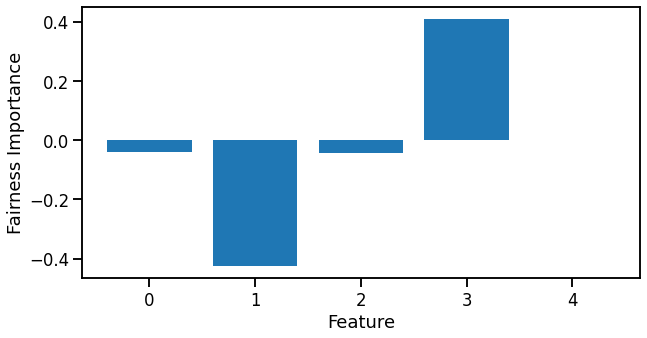

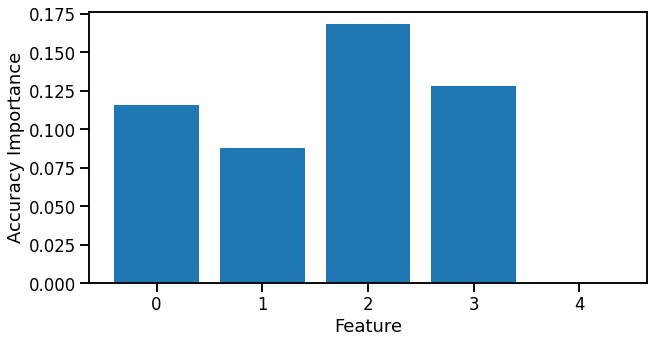

In [18]:
utils.draw_plot(feature,score_fairness,"Results/Synthetic/no_corr/eqop_print_fairness_2_2_1.pdf","Fairness Importance")
utils.draw_plot(feature,score_feature,"Results/Synthetic/no_corr/dp_print_feature_2_2_1.pdf","Accuracy Importance")


In [19]:
utils.print_tree(model_dtree)


The binary tree structure has 779 nodes and has the following tree structure:

splitnode=0
 impurity 0.5, 
 fairness 1.0 
 samples 2000 
 z0 1057, z1 943
 pos_z0 357,pos_z1 643
 split 1 if X[:,3] <= 49.481737974863464 else 2.
	splitnode=1
	 impurity 0.4037191333297727, 
	 fairness 0.978383888547643 
	 samples 948 
	 z0 559, z1 389
	 pos_z0 90,pos_z1 176
	 split 3 if X[:,4] <= 54.06098746868619 else 4.
	splitnode=2
	 impurity 0.42181468576963665, 
	 fairness 0.978383888547643 
	 samples 1052 
	 z0 498, z1 554
	 pos_z0 267,pos_z1 467
	 split 371 if X[:,2] <= 13.007039733109023 else 372.
		splitnode=3
		 impurity 0.49012112707859556, 
		 fairness 0.982449494949495 
		 samples 249 
		 z0 117, z1 132
		 pos_z0 47,pos_z1 95
		 split 5 if X[:,1] <= 14.540948841839555 else 6.
		splitnode=4
		 impurity 0.2918536802012275, 
		 fairness 0.982449494949495 
		 samples 699 
		 z0 442, z1 257
		 pos_z0 43,pos_z1 81
		 split 139 if X[:,1] <= 14.981299653138262 else 140.
			splitnode=5
			 impurity 0.4

In [20]:
cov = np.zeros(total_feature-1)
for i in range (total_feature - 1):
    cov[i],_ = pearsonr(dataframe[str(i+1)].to_numpy(),y)
    print(cov[i])

0.33874560216012495
0.3363339571557893
0.4699407166098696
-0.4196494948662253


In [21]:
fairness_depth = np.zeros((model_dtree.total_level,total_feature))
for i in range (model_dtree.total_level):
    fairness_importance = model_dtree._fairness_importance_depth(i)
    for key, value in fairness_importance.items():
        fairness_depth[i][int(key)-1] = value

In [22]:
for i in range (len(fairness_depth)):
        print("level ",i," ",fairness_depth[i])

level  0   [0. 0. 0. 0. 0.]
level  1   [0.        0.        0.        0.0019271 0.       ]
level  2   [-0.10642135  0.          0.          0.0019271   0.        ]
level  3   [-0.10642135  0.          0.          0.02173509  0.        ]
level  4   [-0.10642135  0.          0.0034878   0.02173509  0.        ]
level  5   [-0.10125468  0.          0.0034878   0.02173509  0.        ]
level  6   [-0.10125468  0.         -0.00065505  0.02173509  0.        ]
level  7   [-0.10054039  0.         -0.00065505  0.02173509  0.        ]
level  8   [-0.10791182  0.         -0.00065505  0.02173509  0.        ]
level  9   [-0.10791182  0.          0.00038384  0.02173509  0.        ]
level  10   [-0.10791182  0.          0.00038384  0.02445731  0.        ]
level  11   [-0.10791182  0.          0.00038384  0.02445731  0.        ]
level  12   [-0.10791182  0.          0.00038384  0.02445731  0.        ]
level  13   [-0.10791182  0.          0.00427273  0.02445731  0.        ]
level  14   [-0.11041182  0. 